# Western Indian Ocean (toy)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from subprocess import check_call

from datetime import datetime
from pathlib import Path

import config
import cson_forge

# Define the grid

Specify the grid name and parameters defining its geometry and MPI domain decomposition.

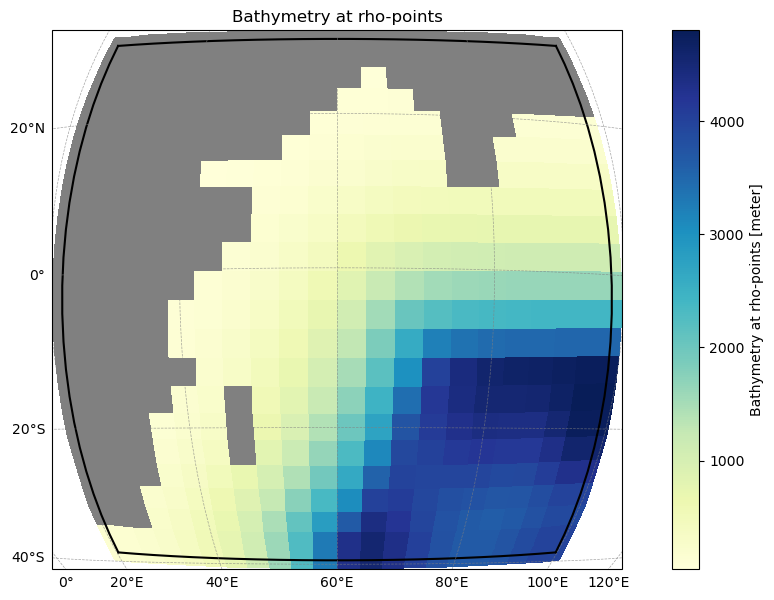

In [3]:
model_name = "roms-marbl"
grid_name = "wio-toy"

start_time = datetime(2012, 1, 1)
end_time = datetime(2012, 1, 2)

boundaries={
        "south": True,
        "east": True,
        "north": True,
        "west": True, 
    }

np_eta = 5 # number of partitions in eta (y) 
np_xi = 2 # number of partitions in xi (x) 

grid_kwargs = dict(
    nx=20,           # number of grid points in x-direction
    ny=20,           # number of grid points in y-direction
    N=10,             # number of vertical layers
    size_x=8000,       # domain size in x-direction (km)
    size_y=8000,       # domain size in y-direction (km)
    center_lon=60.0,    # center longitude (E)
    center_lat=-4.0,    # center latitude (S)
    rot=0,            # no rotation
)

ocn = cson_forge.OcnModel(
    model_name=model_name,
    grid_name=grid_name,
    grid_kwargs=grid_kwargs,
    boundaries=boundaries,    
    start_time=start_time,
    end_time=end_time,
    np_eta=np_eta,
    np_xi=np_xi,
)
ocn.grid.plot()

In [4]:
ocn.prepare_source_data(clobber=False)

✔️  Using existing GLORYS_REGIONAL file for 2012-01-01: cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_wio-toy_20120101.nc
✔️  Using existing GLORYS_REGIONAL file for 2012-01-02: cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_wio-toy_20120102.nc
✔️  TPXO dataset verified at: /Users/mclong/cson-forge-data/source-data/TPXO/TPXO10.v2
✔️  Using existing BGC dataset: /Users/mclong/cson-forge-data/source-data/UNIFIED_BGC/BGCdataset.nc


In [5]:
inputs = ocn.generate_inputs(clobber=False)

2025-12-05 17:43:00 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_wio-toy/roms_grid.nc
2025-12-05 17:43:00 - INFO - Sea surface height will NOT be used to adjust depth coordinates.


⚠️  Clobber=True: removing 88 existing .nc files in /Users/mclong/cson-forge-data/input-data/roms-marbl_wio-toy...

▶️  [1/9] Writing ROMS grid...

▶️  [2/9] Generating initial conditions...


2025-12-05 17:43:06 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_wio-toy/roms_initial_conditions.nc


[########################################] | 100% Completed | 28.83 ss


2025-12-05 17:43:35 - INFO - No path specified for ERA5 source; defaulting to ARCO ERA5 dataset on Google Cloud.



▶️  [3/9] Generating surface forcing (physics)...


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
2025-12-05 17:44:49 - INFO - Data will be interpolated onto the fine grid. Remember to set `interp_frc = 0` in your `bulk_frc.opt` ROMS option file.
2025-12-05 17:44:57 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_wio-toy/roms_surface_forcing_201201.nc


[########################################] | 100% Completed | 10.48 ss


2025-12-05 17:45:12 - INFO - Data will be interpolated onto the fine grid. Remember to set `interp_frc = 0` in your `bgc.opt` ROMS option file.
2025-12-05 17:45:13 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_wio-toy/roms_surface_forcing_bgc_clim.nc



▶️  [4/9] Generating surface forcing (BGC)...
[########################################] | 100% Completed | 106.46 ms


2025-12-05 17:45:13 - INFO - Sea surface height will NOT be used to adjust depth coordinates.



▶️  [5/9] Generating boundary forcing (physics)...


2025-12-05 17:45:19 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_wio-toy/roms_boundary_forcing_201201.nc


[########################################] | 100% Completed | 1.96 sms


2025-12-05 17:45:21 - INFO - Sea surface height will NOT be used to adjust depth coordinates.



▶️  [6/9] Generating boundary forcing (BGC)...


2025-12-05 17:45:23 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_wio-toy/roms_boundary_forcing_bgc_clim.nc


[########################################] | 100% Completed | 9.70 ss

▶️  [7/9] Generating tidal forcing...


2025-12-05 17:45:36 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_wio-toy/roms_tidal_forcing.nc


[########################################] | 100% Completed | 3.99 sms

▶️  [8/9] Generating river forcing...


2025-12-05 17:45:40 - INFO - No river indices provided. Identify all rivers within the ROMS domain and assign each of them to the nearest coastal point.
2025-12-05 17:45:40 - INFO - Compute climatology for river forcing.
2025-12-05 17:45:40 - INFO - Creating 14 synthetic river(s) to handle overlapping entries.
2025-12-05 17:45:41 - WARNING - NaNs detected in 'river_volume' and set to zero. This may indicate missing river data and affect model accuracy. 
2025-12-05 17:45:41 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_wio-toy/roms_rivers.nc



▶️  [9/9] Partitioning input files across tiles...

✅ All input files generated and partitioned.

📄  Wrote ROMSInputs blueprint to /Users/mclong/codes/cson-forge/workflows/blueprints/roms-marbl_wio-toy/blueprint_roms-marbl-wio-toy.yml


### Quick look at some forcing

[########################################] | 100% Completed | 209.36 ms


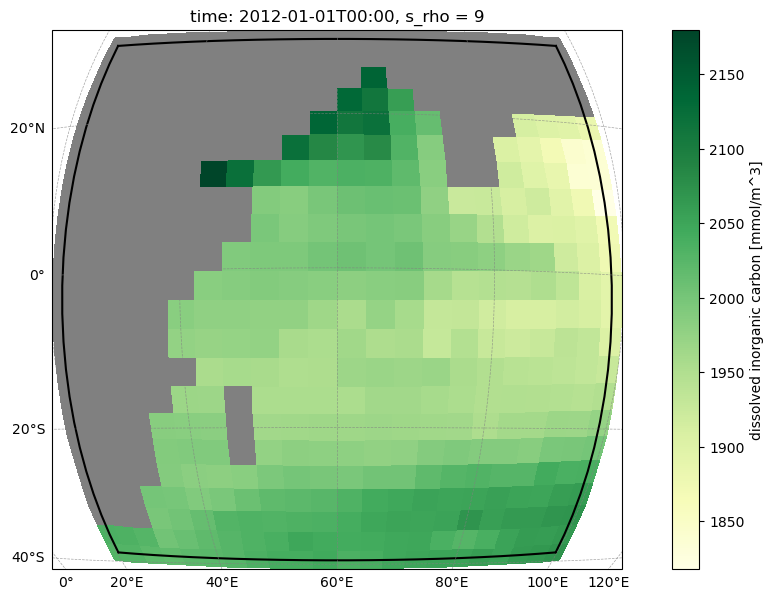

In [6]:
inputs["initial_conditions"].plot("DIC", s=-1)

[########################################] | 100% Completed | 523.45 ms


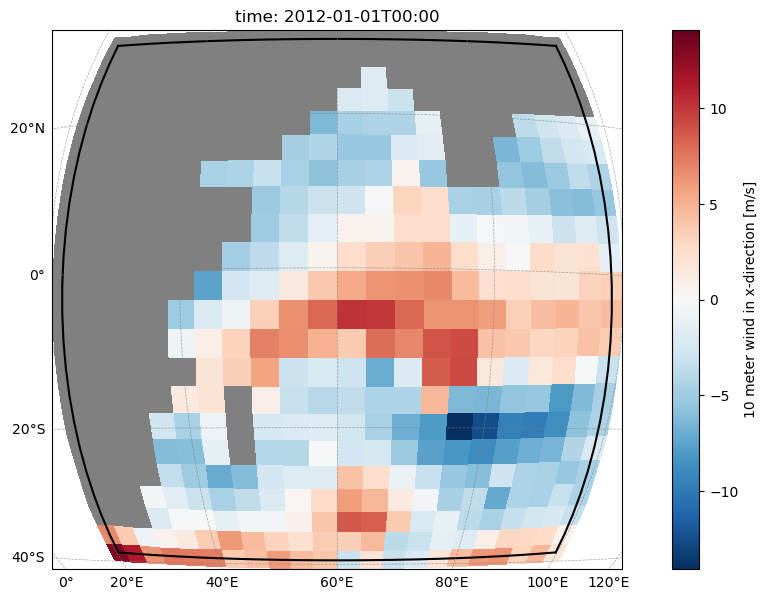

In [7]:
inputs["surface_forcing"].plot("uwnd", time=0)

## Build the model

Apply templating to source code and input files, then build the model

In [8]:
parameters = {
    "param.opt": dict(NP_XI=np_xi, NP_ETA=np_eta, NX=ocn.grid.nx, NY=ocn.grid.ny, NK=ocn.grid.N),
    "river_frc.opt": dict(nriv=inputs["rivers"].ds.sizes["nriver"]),
}

ocn.build(parameters, clean=True)

Build token: 20251205T174545Z-de6e6ce3
Building roms-marbl for grid: wio-toy
roms-marbl opt_base_dir : /Users/mclong/codes/cson-forge/workflows/model-configs/opt_base/opt_base_roms-marbl-cson-default
ROMS opt_dir      : /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_wio-toy/opt
ROMS build_dir    : /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_wio-toy/bld
Input data path   : /Users/mclong/cson-forge-data/input-data/roms-marbl_wio-toy
ROMS_ROOT         : /Users/mclong/cson-forge-data/codes/ucla-roms
MARBL_ROOT        : /Users/mclong/cson-forge-data/codes/MARBL
Conda env         : roms_env
Logs              : /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_wio-toy/logs
Conda env 'roms_env' already exists.
Using compiler kind: gnu
Found 5 existing build(s) in /Users/mclong/codes/cson-forge/workflows/builds.yml.
Matching build found: token=20251124T033840Z-fdfa3c15
  -> using existing executable at: /Users/mclong/codes/cson-forge/workflows/builds/roms-mar

PosixPath('/Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_wio-toy/exe/roms-marbl-wio-toy-20251205T174545Z-de6e6ce3')

In [9]:
ocn.run(case="test.001")

Copying settings input files from /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_wio-toy/opt to /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_wio-toy/test.001:
  roms.in -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_wio-toy/test.001/roms.in
  marbl_in -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_wio-toy/test.001/marbl_in
  marbl_tracer_output_list -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_wio-toy/test.001/marbl_tracer_output_list
Rendering master settings file: roms.in
  Rendered roms.in -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_wio-toy/test.001/roms.in
Copying executable to run directory:
  /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_wio-toy/exe/roms-marbl-wio-toy-20251205T174545Z-de6e6ce3 -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_wio-toy/test.001/roms-marbl-wio-toy-20251205T174545Z-de6e6ce3
Running model locally in conda env 'roms_env': mpirun -n 10 /Users/mclong/cson-fo

RuntimeError: Model run failed with exit code 11. See log file for details: /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_wio-toy/test.001/test.001.20251205T174701Z.log